In [16]:
from bioblend.galaxy import GalaxyInstance
import pandas as pd
from io import StringIO
import os
import requests
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

# Add galaxy API key
Add `GALAXY_API_KEY` from `https://usegalaxy.eu/user/api_key` via `export GALAXY_API_KEY="<key>"` or `%env  GALAXY_API_KEY=<key>` in jupyter

In [36]:
%env GALAXY_API_KEY=

env: GALAXY_API_KEY=


## Collection of AMR, VR counts

In [18]:
def get_summary_of_collection(gi, collection_name, history_id, column_name):
    """
    Collects the counts of datasets in a collection
    """

    datasets = gi.datasets.get_datasets(name = collection_name, history_id = history_id)

    #print(datasets)

    #fetch collection by name
    if len(datasets) > 1:
        print("too many datasets with that name")

    for dataset in datasets:
        if dataset['history_content_type']=='dataset_collection': #get only collections
            if dataset['job_state_summary']['all_jobs'] == dataset['job_state_summary']['ok']: #get only collections where all jobs are ok
                dataset_collection_id = dataset["id"]

    look_up = {}
    # get data of the elements in the collection
    collection = gi.dataset_collections.show_dataset_collection(dataset_collection_id = dataset_collection_id)
    for element in collection['elements']:

        element_name = element['element_identifier']
        element_id = element['object']['id']
        data = gi.datasets.download_dataset(element_id, maxwait = 3)
        df = pd.read_csv(StringIO(data.decode("utf-8")), sep="\t")

        look_up[element_name] = len(df)
        print(element_name, len(df))

    df = pd.DataFrame(look_up.items())
    df.set_index(0, inplace=True)
    df.index.name = "Name"
    df.columns = [column_name]

    return(df)    

# Palestine Data

## Get df for AMR and VF

Please insert your History ID here

In [19]:
gi = GalaxyInstance(url='https://usegalaxy.eu/', key=os.environ['GALAXY_API_KEY'])

collection_name = "vfs_of_genes_identified_by_vfdb"
history_id = "518aa564ea5bec74"
column_name = "VFs"

Palestine_VF_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

collection_name = "amr_identified_by_ncbi"
history_id = "518aa564ea5bec74"
column_name = "AMR"

Palestine_AMR_df = get_summary_of_collection(gi, collection_name, history_id, column_name)

too many datasets with that name
barcode01 203
barcode02 204
barcode03 207
barcode04 203
barcode05 203
barcode06 204
barcode07 203
barcode08 203
barcode09 172
barcode10 203
barcode11 172
barcode12 203
barcode13 204
barcode14 203
barcode15 204
barcode16 203
barcode17 191
barcode18 192
barcode19 198
barcode20 96
barcode21 96
barcode22 96
barcode23 96
barcode24 96
barcode25 96
barcode26 96
barcode27 96
barcode28 96
barcode29 96
barcode30 96
barcode31 96
barcode32 96
barcode33 96
barcode34 96
barcode35 96
barcode36 96
barcode37 96
barcode38 96
barcode39 96
barcode40 96
barcode41 96
barcode42 96
barcode43 96
barcode44 96
barcode45 96
barcode46 96
barcode47 96
barcode48 96
barcode49 96
barcode50 96
barcode51 96
barcode52 96
barcode53 96
barcode54 96
barcode55 96
barcode56 96
barcode57 96
barcode58 96
barcode59 96
barcode60 96
barcode61 96
barcode62 96
barcode63 96
barcode64 96
barcode65 96
barcode66 96
barcode67 96
barcode68 97
barcode69 108
barcode70 108
barcode71 108
barcode72 108
barcode7

In [20]:
frames = [Palestine_VF_df, Palestine_AMR_df]
palestine_merged_df = pd.concat(frames, axis = 1)

#from IPython.core.display import HTML
print(palestine_merged_df.to_string())

           VFs  AMR
Name               
barcode01  203    6
barcode02  204    8
barcode03  207   15
barcode04  203   13
barcode05  203    6
barcode06  204    6
barcode07  203    6
barcode08  203    6
barcode09  172    9
barcode10  203    6
barcode11  172   10
barcode12  203    6
barcode13  204    6
barcode14  203    6
barcode15  204    6
barcode16  203    6
barcode17  191    2
barcode18  192    2
barcode19  198    2
barcode20   96   12
barcode21   96   12
barcode22   96   12
barcode23   96   12
barcode24   96   12
barcode25   96   12
barcode26   96   15
barcode27   96   12
barcode28   96   12
barcode29   96   12
barcode30   96   12
barcode31   96   12
barcode32   96   12
barcode33   96   12
barcode34   96   12
barcode35   96   12
barcode36   96   12
barcode37   96   12
barcode38   96   12
barcode39   96   12
barcode40   96   12
barcode41   96   12
barcode42   96   12
barcode43   96   12
barcode44   96   12
barcode45   96   12
barcode46   96   15
barcode47   96   12
barcode48   96   12


## Map with metadata

In [21]:
palestine_meta_df = pd.read_excel(open('data/FoodbornePathogenDetectionDataAnalysis.xlsx', 'rb'), sheet_name='Palestine') 
palestine_meta_df.set_index("Galaxy ID", inplace=True)
palestine_meta_df.index.name = "Name"
palestine_frames = [palestine_merged_df, palestine_meta_df]
palestine_result = pd.concat(palestine_frames, axis = 1)
# print(len(result.columns))
# print(len(meta_df.columns))

print(palestine_result.to_string())

           VFs  AMR Barcode Name Sample  Barcode No.        ID Data Sequencing Source  Sequencing Date           Information         Medium  Galaxy Analysis Date  History Link  Comments
Name                                                                                                                                                                                     
barcode01  203    6    barcode01    S01            1      S231             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode02  204    8    barcode02    S02            2      S239             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode03  207   15    barcode03    S03            3  SF2707-H             Palestine              2021   Salmonella enterica  Chicken Stool                   NaN           NaN       NaN
barcode04  203   13    barcode04    S04            4  SF2710-H        

## Plot it

### Heatmap with VFs

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df1 = palestine_result[['Medium','Information','VFs']]

VFs_heatmap_pt = pd.pivot_table(df1,values='VFs', index='Medium', columns='Information')
VFs_heatmap_pt

Information,Campylobacter jejuni,Salmonella enterica
Medium,,
Chicken Stool,102.521739,203.714286
Human Stool,98.000000,196.250000
Meat,96.000000,195.500000


In [24]:
df2 = palestine_result[['Barcode Name','Information','VFs']]

VFs_heatmap_pt_2 = pd.pivot_table(df2,values='VFs', index='Barcode Name', columns='Information')
VFs_heatmap_pt_2

Information,Campylobacter jejuni,Salmonella enterica
Barcode Name,,
barcode01,NaN,203.0
barcode02,NaN,204.0
barcode03,NaN,207.0
barcode04,NaN,203.0
barcode05,NaN,203.0
...,...,...
barcode80,108.0,NaN
barcode81,107.0,NaN
barcode82,108.0,NaN


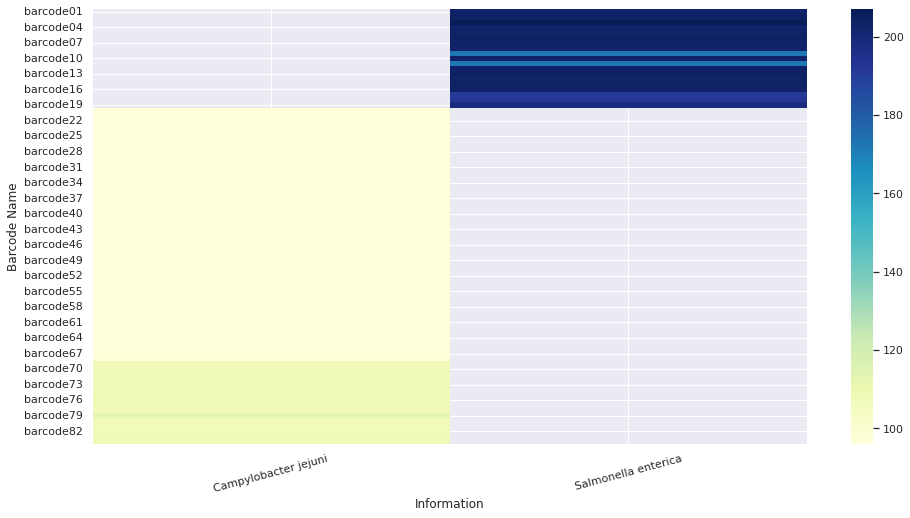

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(VFs_heatmap_pt_2, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

#### Heatmap with VF Accession IDs

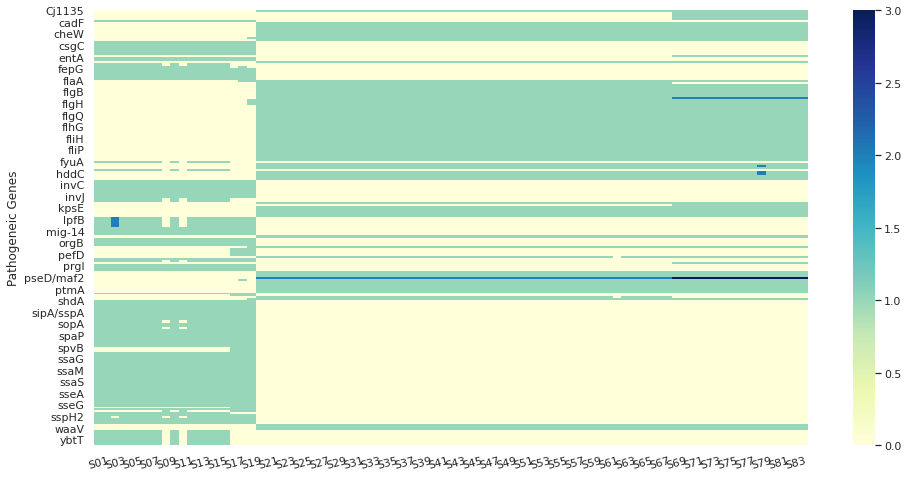

In [32]:
import scipy
palestineVFs = pd.read_csv('data/PalestineVFheatmapSampleNoGenes.csv')
palestineVFs.set_index("KEY", inplace=True)
palestineVFs.index.name = "Pathogeneic Genes"
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
#sns.clustermap(palestineVFs, yticklabels=True, xticklabels=True)
sns.heatmap(palestineVFs, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()

#### Clusterplot with VF Accession IDs

/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/nasr/miniconda3/envs/jupyterlab/lib/python3.9/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


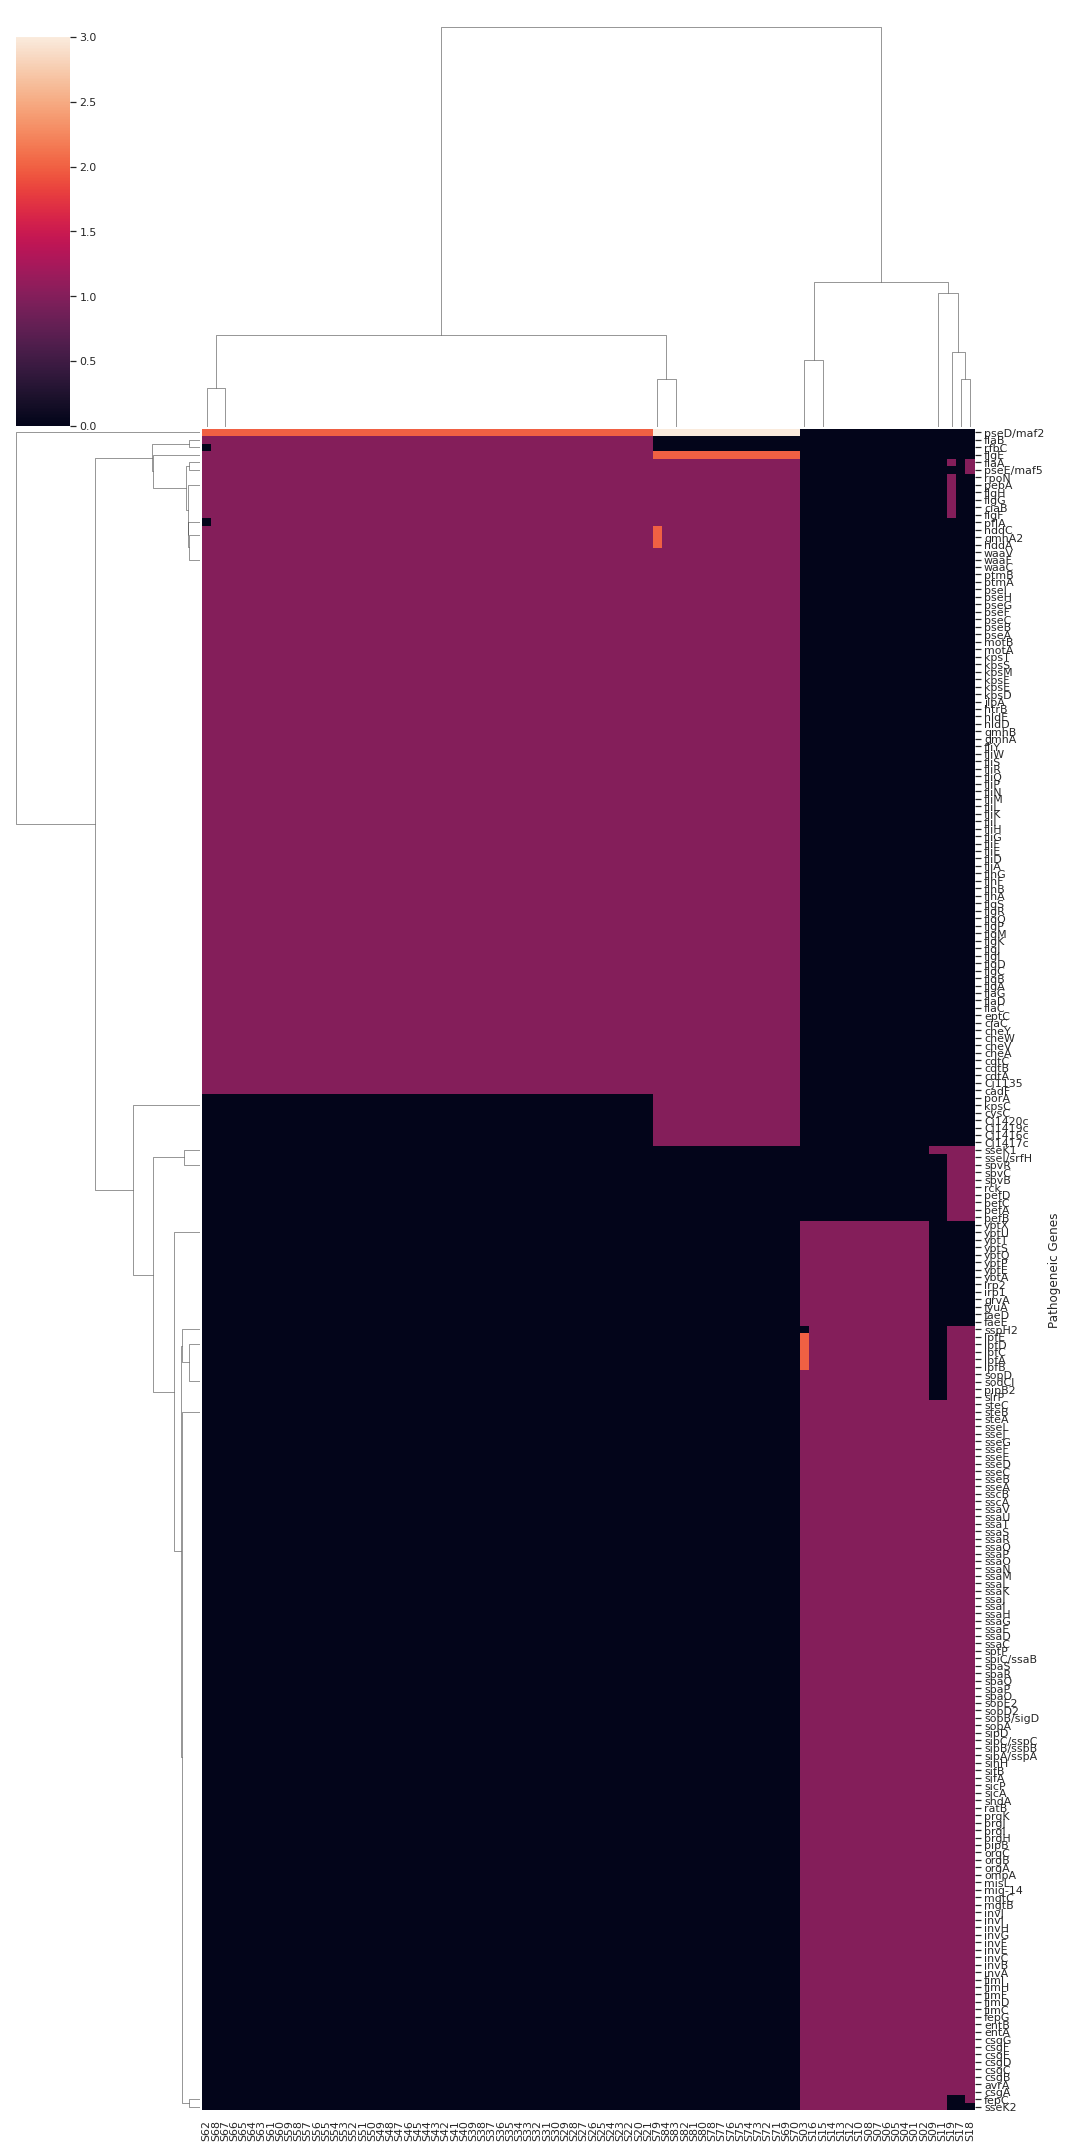

In [33]:
sns.clustermap(palestineVFs,figsize=(15, 30), yticklabels=True, xticklabels=True)


### Heatmap with AMRs

In [34]:
df3 = palestine_result[['Medium','Information','AMR']]

AMR_heatmap_pt = pd.pivot_table(df3,values='AMR', index='Medium', columns='Information')
AMR_heatmap_pt

Information,Campylobacter jejuni,Salmonella enterica
Medium,,
Chicken Stool,6.913043,8.571429
Human Stool,10.375000,3.000000
Meat,12.166667,6.875000


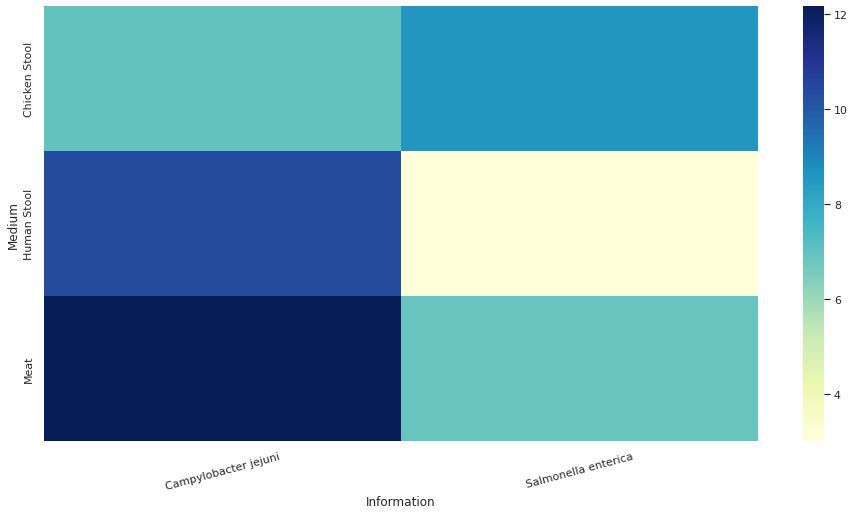

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
sns.set()
sns.heatmap(AMR_heatmap_pt, cmap='YlGnBu')
plt.xticks(rotation=15)
plt.show()